<a href="https://colab.research.google.com/github/lorenzopaolucci/Cygno_Lab_II/blob/Teresa/plot_Generate_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inizializzation.

This Cell download and intstall ROOT in python 2 environment. 

Runs this part of the script only when you have to init a new machine e and working space

In [5]:
# sitallazione di ROOT dal CERN
!mkdir -p APPS
!pwd
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

# main paths for ROOT  
import sys
sys.path.append("/content/APPS/root/lib")
import ctypes
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')
# itsllation and root-numpy main PATH
!pip install root-numpy
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGpad.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTreePlayer.so')
# patch to open online FILE
! sudo apt-get install libdavix0v5
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRDAVIX.so')
! echo "Davix.GSI.CACheck: n" >> $ROOTSYS/etc/system.rootrc
! cp $ROOTSYS/etc/system.rootrc $HOME/.rootrc
! tail -1 $HOME/.rootrc

/content
--2020-05-02 20:31:56--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.1’

root_v6.13.08.Linux 100%[===================>] 131.05M  94.2MB/s    in 1.4s    

2020-05-02 20:31:57 (94.2 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.1’ saved [137415272/137415272]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libdavix0v5 is already the newest version (0.6.7-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Davix.GSI.CACheck: n


This Cell Load funcions (libraries) to retrive data from swift CYGNO server

Runs this part of the script only when you have to init a new machine e and working space

In [6]:
!pip install -q  python-swiftclient
!pip install -q  keystoneauth1
!pip install -q  h5py
import matplotlib.pyplot as plt
import numpy as np    
import ROOT
import root_numpy as rtnp
! rm cygnus_lib.*; rm mylib.*
! wget https://raw.githubusercontent.com/gmazzitelli/cygno/master/cygnus_lib.py
! wget https://raw.githubusercontent.com/gmazzitelli/cygno/master/mylib.py
sys.path.append('.')
import cygnus_lib as cy
import mylib as my
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy.stats as stats
from itertools import combinations
import math
import os

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

x_resolution = y_resolution = 2048
cy.set_atlas_style('square')
!mkdir -p data

--2020-05-02 20:33:18--  https://raw.githubusercontent.com/gmazzitelli/cygno/master/cygnus_lib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24130 (24K) [text/plain]
Saving to: ‘cygnus_lib.py’

cygnus_lib.py       100%[===================>]  23.56K  --.-KB/s    in 0.004s  

2020-05-02 20:33:18 (6.21 MB/s) - ‘cygnus_lib.py’ saved [24130/24130]

--2020-05-02 20:33:21--  https://raw.githubusercontent.com/gmazzitelli/cygno/master/mylib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17634 (17K) [text/plain]
Saving to: ‘mylib.py’

mylib.

Generate data stream file looking for close clusters in any images: 

1.   download pedestal file [run_ped]
2.   download dafa file/s [runI] from specifc location [dataSelection]
3.   Serch for cluster with DBSCAN
4.   save output in txt file


Pedestal mean: 99.55, sigma: 0.95, over th. (300) 9
Sigma mean: 2.51, sigma: 2.16, over th. (50) 8
light over Th: 15768690.56 
Open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run01856.root
Find Keys: 200
# of Images (TH2) Files: 100 
# of Waveform (TH2) Files: 100 
('Processing RUN: ', 1856, 'Event: ', 0)


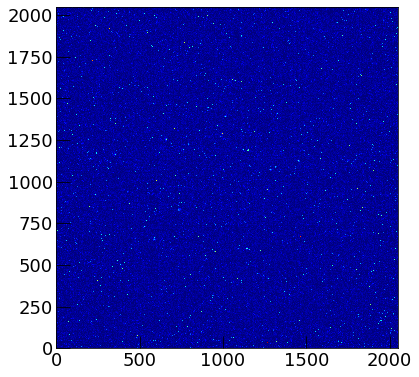

1


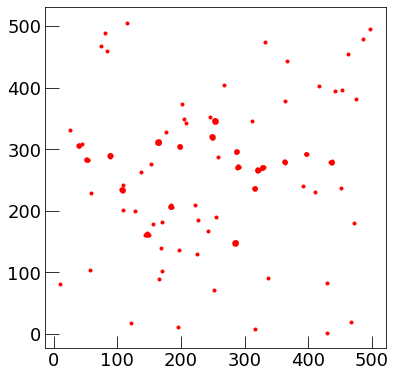

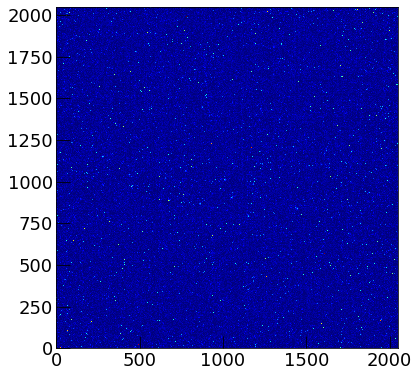

1


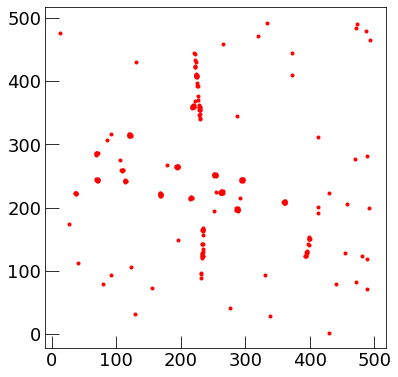

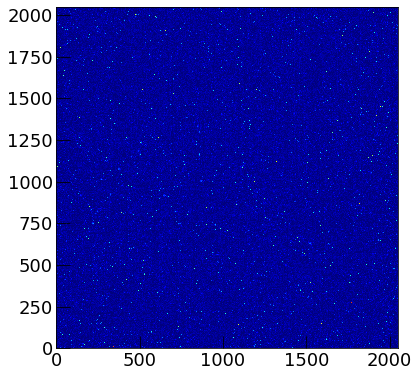

1


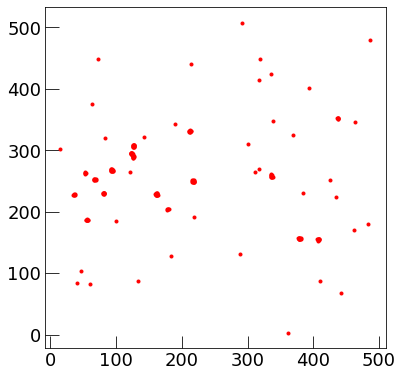

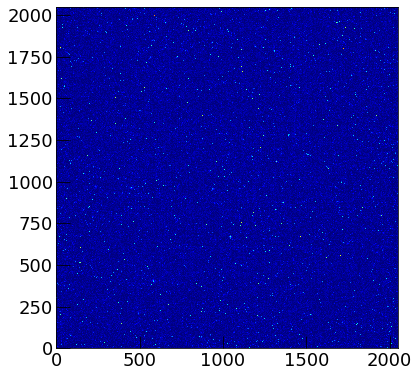

1


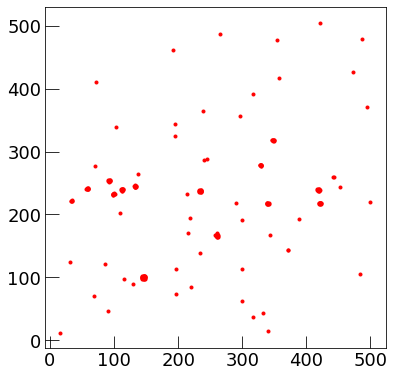

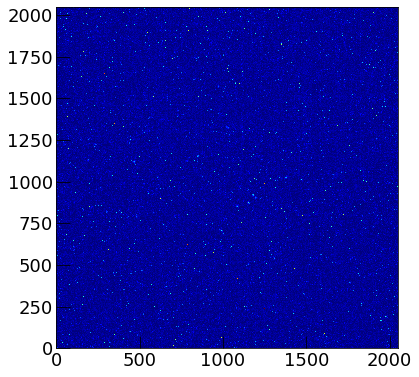

1


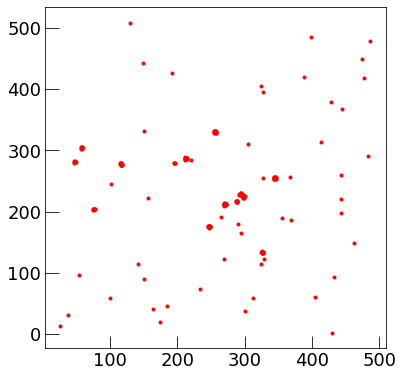

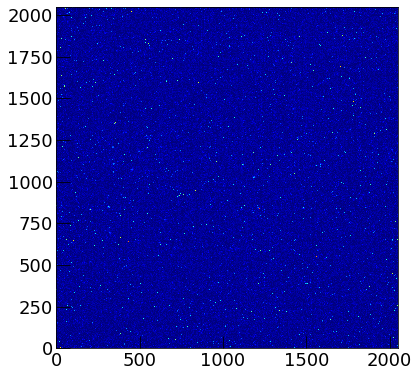

1


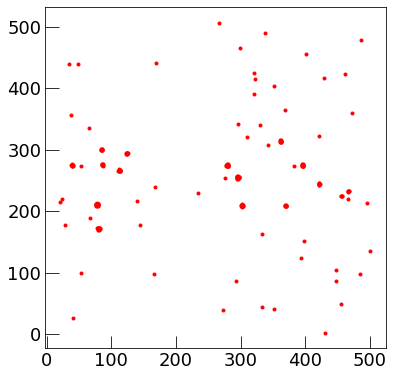

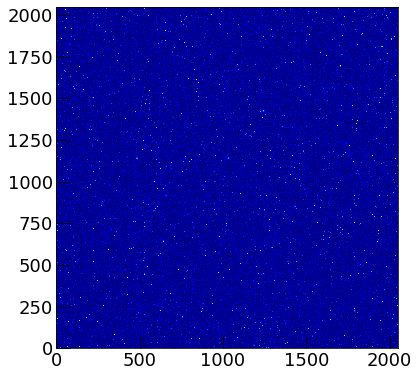

1


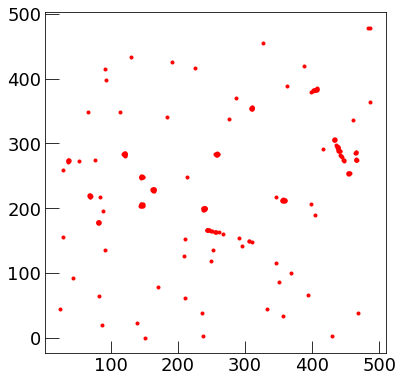

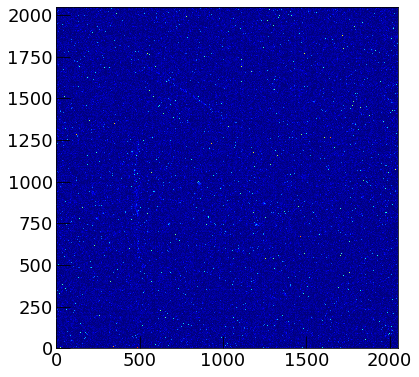

1


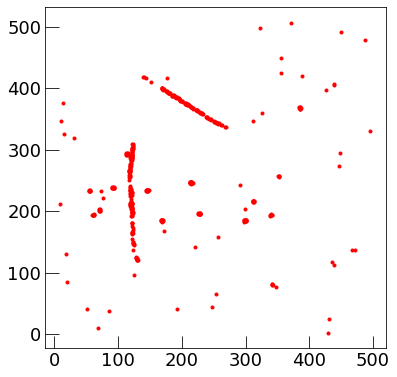

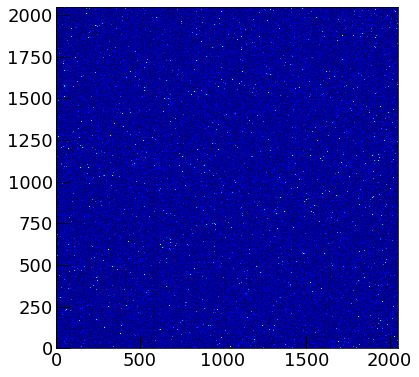

1


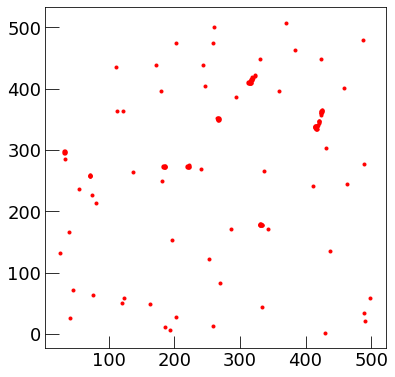

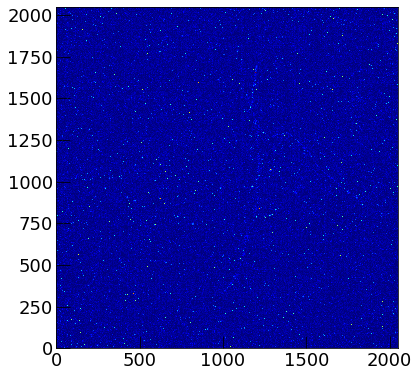

1


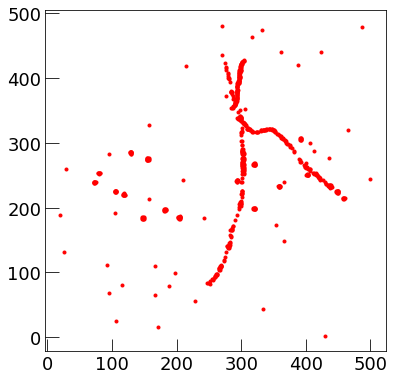

('Processing RUN: ', 1856, 'Event: ', 10)


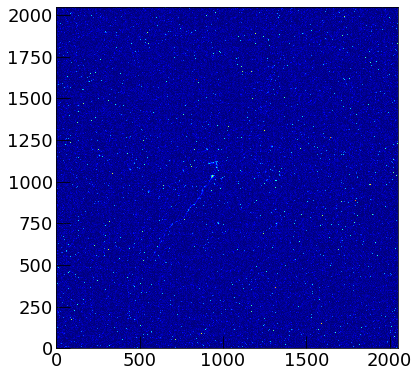

1


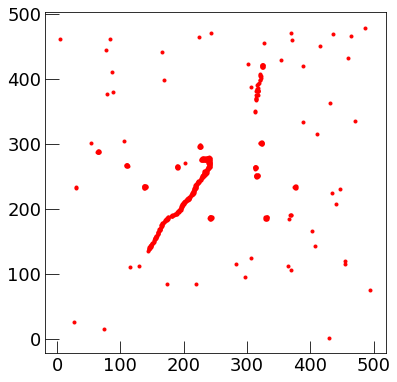

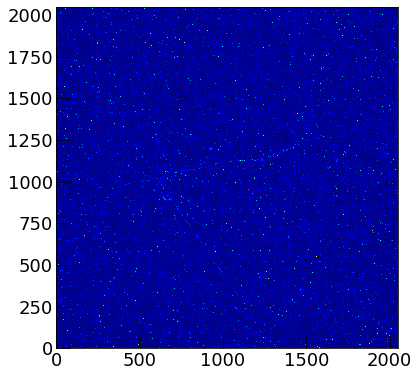

1


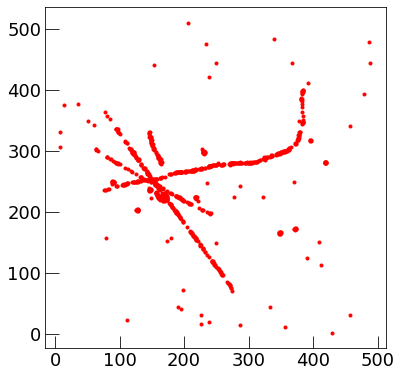

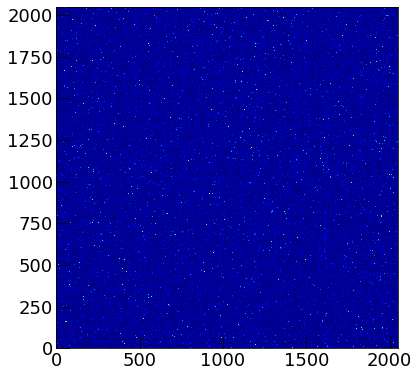

1


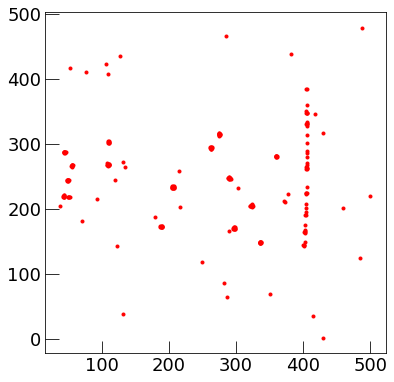

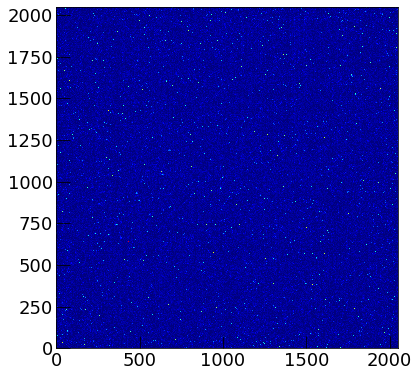

1


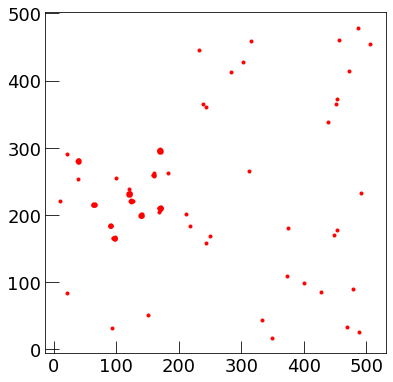

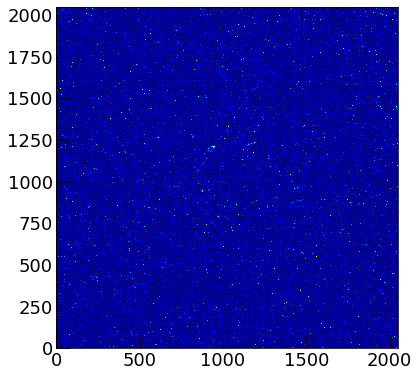

1


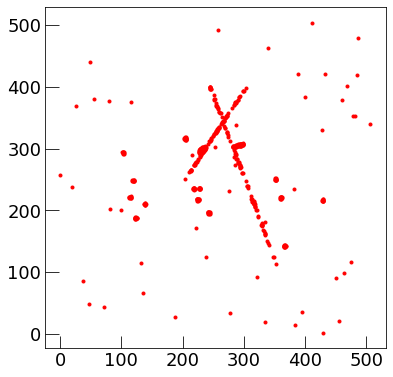

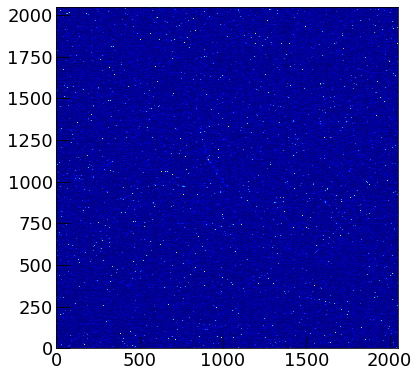

1


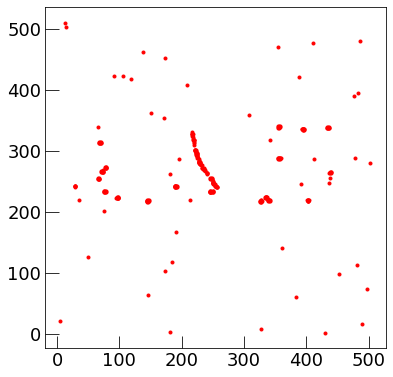

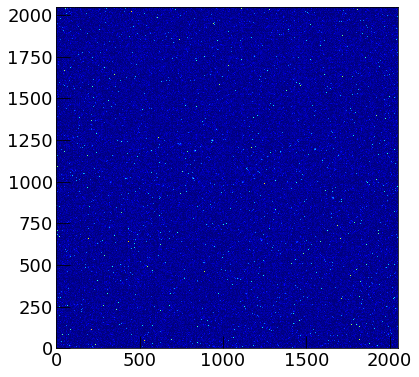

1


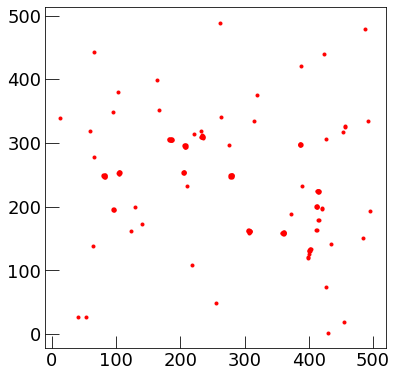

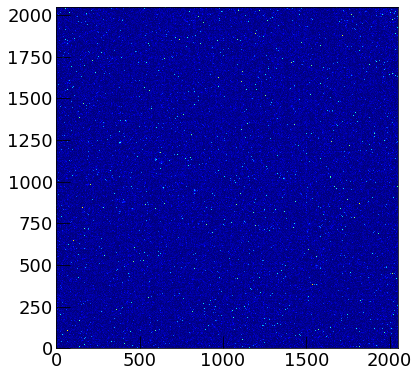

1


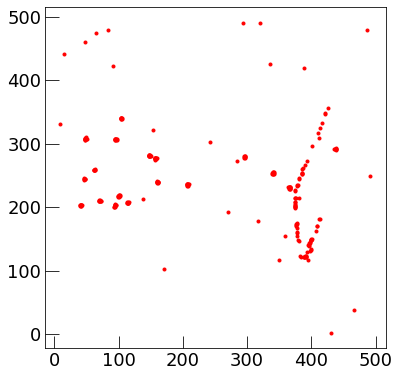

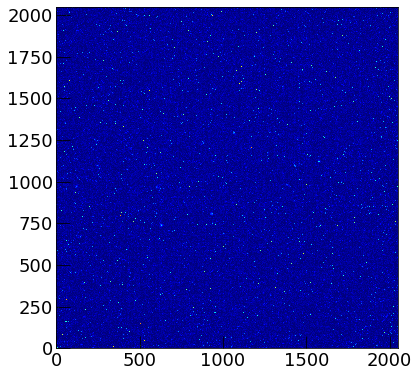

1


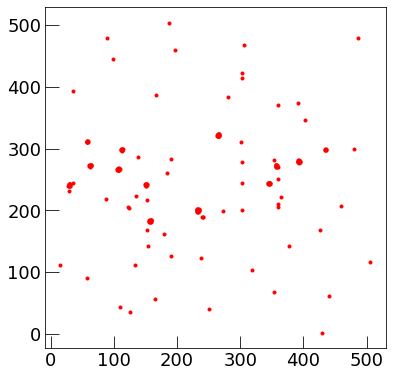

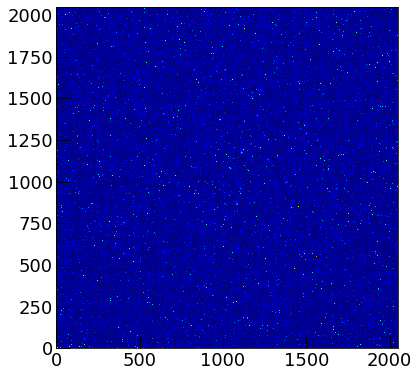

1


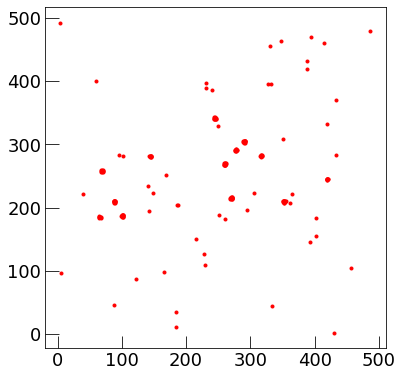

('Processing RUN: ', 1856, 'Event: ', 20)


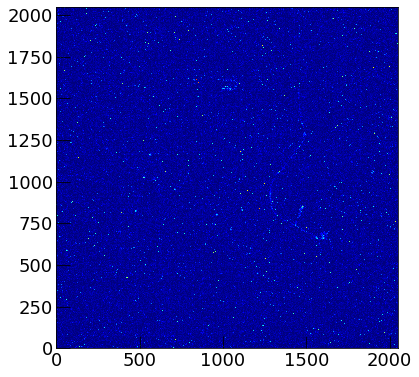

1


KeyboardInterrupt: ignored

2020-05-02 20:42:14 URL:https://raw.githubusercontent.com/gmazzitelli/cygno/master/data/run1748_mean.h5 [33556480/33556480] -> "./data/run1748_mean.h5" [1]
2020-05-02 20:42:14 URL:https://raw.githubusercontent.com/gmazzitelli/cygno/master/data/run1748_sigma.h5 [33556480/33556480] -> "./data/run1748_sigma.h5" [1]


In [11]:
runI          = [1856] 
run_ped       = 1748 
cimax         = 300
cimin         = 0 
dataSelection = 'LAB'
rescale       = 512
nsigma        = 1.5

try:
  fh5 = ("run%d_mean.h5" % (run_ped))
  cmd = 'wget -nv https://raw.githubusercontent.com/gmazzitelli/cygno/master/data/'+fh5+' -O ./data/'+fh5
  os.system(cmd)
  fh5 = ("run%d_sigma.h5" % (run_ped))
  cmd = 'wget -nv https://raw.githubusercontent.com/gmazzitelli/cygno/master/data/'+fh5+' -O ./data/'+fh5
  os.system(cmd)
except:
  print ("No Pedestal file for run %s on remote repo" % run_ped)

#########################

try:
    fileoutm = ("./data/run%d_mean.h5" % (run_ped))
    m_image = cy.read_image_h5(fileoutm)
    PedOverMax = m_image[m_image > cimax].size
    print ("Pedestal mean: %.2f, sigma: %.2f, over th. (%d) %d" % 
       (m_image[m_image<cimax].mean(), 
        np.sqrt(m_image[m_image<cimax].var()), cimax,
        (m_image>cimax).sum()))
except:
    print ("No Pedestal file for run %s, run script runs-pedestals.ipynb" % run_ped)
    print ("STOP")

    
try: 
    fileouts = ("./data/run%d_sigma.h5" % (run_ped))
    s_image = cy.read_image_h5(fileouts)
    print ("Sigma mean: %.2f, sigma: %.2f, over th. (50) %d" % 
   (s_image[s_image<50].mean(), 
    np.sqrt(s_image[s_image<50].var()), 
    (s_image>50).sum()))
except:
    print ("No Sigma file for run %s, run script runs-pedestals.ipynb" % run_ped)
    print ("STOP")

#########################

th_image   = np.round(m_image + nsigma*s_image)
print ("light over Th: %.2f " % (th_image.sum()-m_image.sum()))
    
for nRi in range(0,len(runI)):
    try:
        print ('Open file: '+cy.swift_root_file(dataSelection, runI[nRi]))
        f = ROOT.TFile.Open(cy.swift_root_file(dataSelection, runI[nRi]))

        print ('Find Keys: '+str(len(f.GetListOfKeys())))
        pic, wfm = cy.root_TH2_name(f)
        max_image = len(pic)
        max_wfm = len(wfm)
        print ("# of Images (TH2) Files: %d " % (max_image))
        print ("# of Waveform (TH2) Files: %d " % (max_wfm))
        nImag=max_image
    except:
        print ("ERROR: No file %d" % (runI[nRi]))
        break

    data_to_save = []
    files = ("./data/dbscan_run%d_cmin_%d_cmax_%d_rescale_%d_nsigma_%.1f_ev_%d_ped_%d.txt" % 
                     (runI[nRi], cimin, cimax, rescale, nsigma, max_image, run_ped))
    
    
    for iTr in range(0, max_image):
        if iTr % 10 == 0: # pach in order overcome the problem of ROOT memory garbage
             print ('Processing RUN: ', runI[nRi], 'Event: ', iTr)

        image = rtnp.hist2array(f.Get(pic[iTr])).T

        plt.imshow(image,vmin=98,vmax=180,cmap='jet',origin='lower')
        plt.show()

        rebin_image     = cy.rebin(image-m_image, (rescale, rescale))  #istogramma root ovvero run - piedistallo 
        rebin_th_image  = cy.rebin((th_image-m_image), (rescale, rescale))

        edges           = (rebin_image > rebin_th_image) & (rebin_image < cimax)    #false and true     
        points          = np.array(np.nonzero(edges)).T.astype(float) 
        scaler          = StandardScaler()
        X_scaled        = scaler.fit_transform(points)

        points_list = []
        for i in np.arange(0,len(rebin_image),1):
          for j in np.arange(0,len(rebin_image),1): 
            if rebin_image[i][j]  > rebin_th_image[i][j] and rebin_image[i][j] < cimax and rebin_image[i][j] != 0:
               points_list.append((i,j,rebin_image[i][j]))

        pointslist=np.array(points_list)   

        dbscan          = DBSCAN(eps=4, min_samples = 20)
        dbscan.fit(pointslist)


        clusters = dbscan.fit_predict(X_scaled)

        core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool) 
        core_samples_mask[dbscan.core_sample_indices_] = True
        labels = dbscan.labels_


        unique_labels = set(labels)  
        count=0 
        count_p=0
        
        for k in unique_labels:
            if k == -1: # Nero per il rumore
            
               col = [0, 0, 0, 1]
               count+=1
            else:
              count_p+=1 #quanti diversi cluster trova
      
            
               
        
            class_member_mask = (labels == k) #seleziona tutti i punti del cluster k
            #plt.style.use("dark_background")
            if k == -1:

              xy = pointslist[class_member_mask & ~core_samples_mask] #plot del rumore
              print(len(xy))
              plt.plot(xy[:, 1], xy[:, 0], 'ko', markerfacecolor='k',
                    markeredgecolor='k', markersize=3)
              
            else:
              xy = pointslist[class_member_mask & core_samples_mask] #plot solo se è nel cluster E è un core point
              plt.plot(xy[:, 1],xy[:, 0], 'ro', markerfacecolor='r',
                    markeredgecolor='r', markersize=3)
        
              xy = pointslist[class_member_mask & ~core_samples_mask] #plot solo se è nel cluster E non è core == è un edge point del cluster
              plt.plot(xy[:, 1], xy[:, 0], 'ro', markerfacecolor='r',
                    markeredgecolor='r', markersize=3)
              
              

        print(count_p)
        plt.show() 





        for ic in unique_labels:
            ph = 0.
            # print ("value: ", iTr, ic, dbscan.labels_[ic], min(dbscan.labels_), max(dbscan.labels_))
            yc = points[:,1][dbscan.labels_==ic]
            xc = points[:,0][dbscan.labels_==ic]
            ph, dim = cy.cluster_par(yc, xc, rebin_image)
            width, height, pearson = cy.confidence_ellipse_par(yc,xc)

            for j in range(0, dim):
                x=int(xc[j])
                y=int(yc[j])
                #ph += rebin_image[y,x]
                if j == 0:
                    x0start = x
                    y0start = y
            x0end = x
            y0end = y
            data_to_save.append([iTr, ic, dim, ph, ph/dim, 
                                 x0start, y0start, x0end, y0end, width, height, pearson])

    np.savetxt(files, data_to_save, fmt='%.10e', delimiter=" ")
    print ("out file", files)

In [0]:
# outputs (.h5 are the pedestal files)
!ls data

da fare:
1.   studiarsi DBSCAN e come vengono selzionati i dati
2.   mostrare il risultato di cluserizzazione di DBSCAN su ogni imagine (fare un debug delo script mostrando le immagini)
2.   con panda caricare i file di output
2.   guardarsi le varie variabili, visualizzarli, capire che significano
3.   fare la distribuzione del numero di fotoni
4.   fittarla con un esponenziale (coda del fondo) piu' gaussina (picco dei fotoni)
5.   studiare l'andamento del picco del ferro nel tempo per i run pari tra 1856 e 2031





In [0]:
def TGraph2array(tgraph):
  xl = []; yl = []
  for i in range(tgraph.GetN()):
      xi = ctypes.c_double(); yi = ctypes.c_double()
      tgraph.GetPoint(i,xi,yi)
      xl.append(xi.value)
      yl.append(yi.value)
  x = np.array(xl)
  y = np.array(yl)
  return x, y

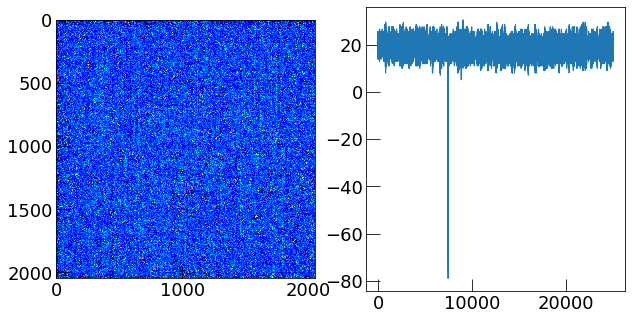

In [0]:
# mostra l'immagine iTr del file ...
fig, ax = plt.subplots (1,2, figsize=(10,5))
iTr = 0
#
f  = ROOT.TFile.Open('https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run01856.root');
pic, wfm = cy.root_TH2_name(f)
#
image = rtnp.hist2array(f.Get(pic[iTr])).T
t,a = TGraph2array(f.Get(wfm[iTr]))
ax[0].imshow(image,  cmap="jet", vmin=95,vmax=120)
ax[1].plot(t,a)
plt.show()

In [0]:
print(unique_labels)

set([0])
